<a target="_blank" href="https://colab.research.google.com/github/ares2012/temp/blob/master/Open_in_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

https://openincolab.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Upload ipynb
from google.colab import files
uploaded = files.upload()

Saving NewClob.csv to NewClob.csv


In [10]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    fontprop = 'Malgun Gothic'
    rc('font', family=fontprop)  # Windows의 경우
elif platform.system() == 'Darwin':  # macOS
    rc('font', family='AppleGothic')
else:  # Linux
    rc('font', family='NanumGothic')


import pandas as pd
import numpy as np

f0='New_Clob.csv'; f3='summary_kw_clob2.csv'
df0 = pd.read_csv(f0); df3 = pd.read_csv(f3)
#print(df0.index, df3.index)  # Print the indices of both DataFrames


merged_df = df0.join(df3, how='inner')
#print(merged_df)

filtered_df = merged_df[merged_df['news_importance'] >= 4]
#print(filtered_df.keywords, filtered_df.CONTENTS, filtered_df.summary, filtered_df.keyword_reason, filtered_df.importance_reason)  # Print the filtered DataFrame
#print(filtered_df)

In [13]:
!pip install rank_bm25 squarify --quiet --upgrade

['세계 최대 규모의 광산업체인 BHP가 니켈 가격 급락과 인도네시아의 생산 급증에 따른 전 세계적인 공급 과잉으로 인해 올해 10월부터 니켈 웨스트(Nickel West) 사업을 중단하기로 결정했다. 해당 사업에는 퀸나나 정련소와 칼쿠를리 제련소, 마운트 키이쓰와 라인스터 광산, 웨스트 머스그레이브(West Musgrave) 개발이 포함된다. 올해 초 시장에 니켈 가격이 급락함에 따라 니켈 웨스트 사업부를 폐쇄하는 것을 고려한다고 밝혔던 BHP는 2027년 2월까지 니켈 웨스트와 웨스트 머스그레이브 프로젝트에 영향을 미치는 결정을 재검토할 것이라고 밝혔다. 제랄딘 슬래터리(Geraldine Slattery) BHP 호주 사장은 성명을 통해 호주에서의 다른 니켈 기업들과 마찬가지로 우리는 니켈의 세계적 과잉 공급으로 인한 상당한 경제적 어려움을 극복하지 못했다라고 말했다. BHP는 해당 사업부의 2,500명의 직원에게 회사의 다른 사업부로의 재배치 기회나 해고 수당을 제공할 것이라고 전했다. 또한 사업 중단으로 인해 영향을 받는 지역사회와 기업을 지원하기 위해 2,000만 호주 달러의 기금을 설립할 예정이다. 또한 2월에 발표한 사업의 장부 가치에 대한 35억 달러의 손상 비용에 3억 달러의 비현금 손상을 추가했다. 마들렌 킹(Madeleine King) 호주 자원부 장관은 BHP의 결정에 대해 실망의 뜻을 나타내며 연방 정부가 BHP와 니켈 부문과 협력해 호주 니켈 생산의 지속을 지원하기 위한 정책 대응에 임했다고 언급했다. 인도네시아에서 저렴한 니켈 공급이 급증하면서 서호주에서 오랫동안 이어져 온 니켈 광산 가동이 점차 중단되고 있다. 지난해 인도네시아의 니켈 생산량은 전 세계의 49%를 차지한 것으로 추산되는데, 인도네시아의 생산비중은 불과 8년 전만 해도 5% 미만에 그쳤었다. BHP의 니켈 웨스트(Nickel West) BHP의 니켈 웨스트 프로젝트가 중단되면 호주에는 IGO의 노바(Nova)와 포레스태니아(Forrestania), 글렌코어의 무린무린

<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53000 (\N{HANGUL SYLLABLE KEL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing

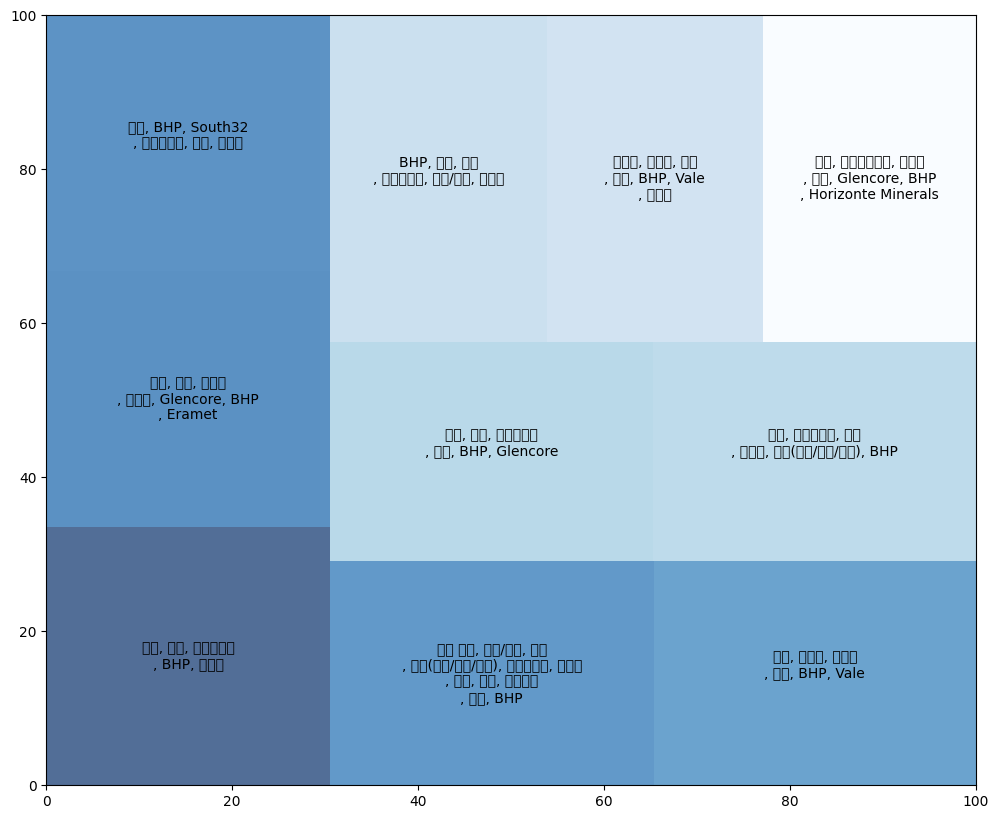

In [14]:
from rank_bm25 import BM25Okapi

# 문서 데이터
#documents = filtered_df['CONTENTS'].tolist()
documents = merged_df['CONTENTS'].tolist()

# 문서를 토큰화
def tokenizer(sent):
  return sent.split(" ")
tokenized_documents = [tokenizer(str(doc)) for doc in documents]

# BM25 모델 생성
bm25 = BM25Okapi(tokenized_documents)

# 쿼리
query = "니켈 공급망"
tokenized_query = tokenizer(query)

# 각 문서와 쿼리 간의 BM25 점수 계산
scores = bm25.get_scores(tokenized_query)

'''
# 결과 출력
for i, score in enumerate(scores):
    print(f"Document {i + 1}: BM25 Score = {score:.4f}")
'''

print(bm25.get_top_n(tokenized_query, documents, n=2))

# BM25 점수를 merged_df에 추가
merged_df['bm25_score'] = scores
# BM25 점수를 기준으로 내림차순 정렬
sorted_df = merged_df.sort_values(by='bm25_score', ascending=False)


import squarify

# BM25 점수를 기준으로 상위 10개의 키워드와 점수를 딕셔너리로 생성
top_10 = sorted_df.nlargest(10, 'bm25_score')
top_10['keywords'] = top_10['keywords'].apply(lambda x: ','.join([x.split(',')[i] + ('\n' if (i + 1) % 3 == 0 else '') for i in range(len(x.split(',')))]))
#top_10['keywords'] = top_10['keywords'].apply(lambda x: '\n'.join([x[i:i+20] for i in range(0, len(x), 20)]))  # 20자 단위로 줄바꿈
sorted_twos = list(zip(top_10['keywords'], top_10['bm25_score']))
sorted_dict = dict(sorted_twos)

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(sorted_dict.values()),
                            vmax=max(sorted_dict.values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in sorted_dict.values()]

# squarify 플랏생성(label 단어, 박스 크기는 빈도, 색깔르 cm.Blue, 투명도는 30%
squarify.plot(label=sorted_dict.keys(),
              sizes=sorted_dict.values(),
              color=colors,
              alpha=.7)
#plt.show()




In [17]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-vpszykz5/kobert-tokenizer_621151b3fc224240815b69446b019c41
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-vpszykz5/kobert-tokenizer_621151b3fc224240815b69446b019c41
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=982cf996864154fc7b78fccff67a2e5c85a9238acb6a3d68937d3a28c381f3bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-_xgh8pcx/wheels/b7/95/7c/3f38b039ae9422cc4a51702b37e352d0585442cbe60285f1f2
Successfully built kobert_tokenizer


In [42]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
model = AutoModel.from_pretrained("skt/kobert-base-v1")
sentences = merged_df['summary'].tolist()
embeddings = tokenizer.tokenize(sentences)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [38]:
from sentence_transformers import SentenceTransformer, models
#from kobert_transformers import get_tokenizer
#tokenizer = get_tokenizer()

#pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'
from kobert_tokenizer import KoBERTTokenizer
# KoBERT 모델과 토크나이저 로드
model_name = "skt/kobert-base-v1"
tokenizer = KoBERTTokenizer.from_pretrained(model_name)

# SentenceTransformer 모델 구성
#word_embedding_model = models.Transformer(model_name, max_seq_length=256)
#pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_mean_tokens=True)

# SentenceTransformer 모델 생성
#model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

# 문장 리스트
sentences = merged_df['summary'].tolist()
print(len(sentences), len(sentences[0]), sentences[0][:127])

# 문장 임베딩 생성
inputs = tokenizer(sentences)
len(inputs)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


380 191 포트 헤들랜드에서 철광석 운송을 담당하는 호주 포트레스큐 메탈스 그룹(FMG)의 철도 운영이 1월 3일까지 정상화될 것으로 예상됩니다. 12월 30일 발생한 열차 탈선 사고로 인한 영향은 없으며, 충분한 재고로 인해 수출량에 미


3

In [54]:
# https://github.com/jhgan00/ko-sentence-transformers
# https://pypi.org/project/ko-sentence-transformers/

from sentence_transformers import SentenceTransformer, util
import numpy as np

model_name = "jhgan/ko-sroberta-multitask"
#model_name = "monologg/kobert"
#model_name = "jhgan/ko-sbert-sts"
embedder = SentenceTransformer(model_name)

sentences = merged_df['summary'].tolist()
corpus_embeddings = embedder.encode(documents, convert_to_tensor=True, show_progress_bar=True)

# Query sentences:
#queries = ['니켈', '공급망']
queries = [query]

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = 10
for q in queries:
 query_embedding = embedder.encode(q, convert_to_tensor=True)
 cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
 cos_scores = cos_scores.cpu()

 #We use np.argpartition, to only partially sort the top_k results
 top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k]

 print("\n\n======================\n\n")
 print("Query:", q)
 print("\nTop 5 most similar sentences in corpus:")

 for idx in top_results[0:top_k]:
  print(documents[idx].strip(), "(Score: %.4f)" % (cos_scores[idx]))

Batches:   0%|          | 0/12 [00:00<?, ?it/s]





Query: 니켈 공급망

Top 5 most similar sentences in corpus:
LME 니켈가격은 최근 5거래일 연속 1만 6천 달러대에서 하락세를 면치 못하는 중이다. BHP사의 서호주 니켈 사업 잠정 중단 소식으로 니켈가격은 소폭 상승하기도 했다. BHP사의 서호주 니켈 사업 중단은 Glencore사의 호주 황산염 생산에도 영향을 줄 것으로 알려졌다. 황산은 니켈제련에서 나오는 부산물이기 때문이다. Glencore와 IGO Limited사의 경우 BHP의 공급업체로, 인도네시아의 니켈 공급 과잉 우려 속에서 호주에 몇 개 남지 않은 니켈 생산업체이기도 하다. Glencore는 인도네시아의 저가 공급량 증가가 전 세계 니켈 시장의 구조적 변화를 이끌어내고 가격하락으로 이끌었다고 설명했다.BHP사는 서호주 광산 프로젝트 중단 배경에 대해 글로벌 니켈 공급과잉과 가격약세로 인한 경제적 어려움을 극복하지 못했으며 공급과잉이 최소 3년 이상 지속될 것으로 전망했다. SMM은 중국 내 니켈 및 황산염 공장에서 판매 촉진을 위해 과도한 할인율을 적용하면서 손실이 발생하고 있어 공장 가동률 저하 및 7월 중국의 니켈 생산량 감소가 불가피할 것으로 예상했다. 올해 4월 2일 이후 최근 니켈가격은 가장 낮은 수준을 기록 중이며, 우량 광산 기업들의 손익분기점에 도달한 수준의 가격대가 형성되어 있다고 지적했다. 광산들의 감산이 이어질 경우 가격은 상방 압력을 받을 수 있을 것으로 예상되기도 했다. 반면, 중국의 지난 6월 정련니켈 생산량은 2만 6,600톤으로 전년비 40.5% 증가했다. SMM은 오는 7월 생산량은 3만 300톤으로 전월대비 큰 폭으로 증가할 것으로 예측했다. 인도네시아의 니켈선철(NPI)의 6월 생산량은 11만 2,200톤으로 전년비 8.5% 증가했으며, 상반기 니켈선철 생산량은 69만 400톤으로 전년비 6.8% 증가했다. LME 재고의 경우 증가세 지속되며 지난 7월 12일 기준 니켈 재고는 9만 8,526톤으로 2년래 최고치 

In [ ]:
import squarify

# BM25 점수를 기준으로 상위 10개의 키워드와 점수를 딕셔너리로 생성
top_10 = sorted_df.nlargest(10, 'bm25_score')
top_10['keywords'] = top_10['keywords'].apply(lambda x: ','.join([x.split(',')[i] + ('\n' if (i + 1) % 3 == 0 else '') for i in range(len(x.split(',')))]))
#top_10['keywords'] = top_10['keywords'].apply(lambda x: '\n'.join([x[i:i+20] for i in range(0, len(x), 20)]))  # 20자 단위로 줄바꿈
sorted_twos = list(zip(top_10['keywords'], top_10['bm25_score']))
sorted_dict = dict(sorted_twos)

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(sorted_dict.values()),
                            vmax=max(sorted_dict.values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in sorted_dict.values()]

# squarify 플랏생성(label 단어, 박스 크기는 빈도, 색깔르 cm.Blue, 투명도는 30%
squarify.plot(label=sorted_dict.keys(),
              sizes=sorted_dict.values(),
              color=colors,
              alpha=.7)
#plt.show()

In [2]:
!pip install feedparser goose3 --upgrade --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import feedparser
import requests
from goose3 import Goose
from goose3.text import StopWordsKorean

In [14]:
def get_data(url):
    try:
        res = requests.get(url)
        html = res.text
        data = feedparser.parse(html)
        print(data.feed.title)
        return data
    except:
        return None

url = 'https://www.yna.co.kr/rss/industry.xml'
url = 'https://www.chosun.com/arc/outboundfeeds/rss/category/economy/?outputType=xml'
parsed_data = get_data(url)

num_entries = 2 # article 정보 확인을 위해 임의로 번호를 지정했습니다.
article = parsed_data['entries'][num_entries]
article

조선일보


{'title': '31평 아파트 낙찰받자 선도지구 선정…1년도 안돼 9천만원 벌었다',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': '',
  'value': '31평 아파트 낙찰받자 선도지구 선정…1년도 안돼 9천만원 벌었다'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://www.chosun.com/economy/realty/investment_trends/2025/05/13/KTVP5NXI3EKBWQ7IFA2I2CFS7A/'}],
 'link': 'https://www.chosun.com/economy/realty/investment_trends/2025/05/13/KTVP5NXI3EKBWQ7IFA2I2CFS7A/',
 'id': 'https://www.chosun.com/economy/realty/investment_trends/2025/05/13/KTVP5NXI3EKBWQ7IFA2I2CFS7A/',
 'guidislink': False,
 'authors': [{'name': '이승우 기자(땅집고)'}],
 'author': '이승우 기자(땅집고)',
 'author_detail': {'name': '이승우 기자(땅집고)'},
 'summary': '[땅집고] 재건축 아파트 경매에 관심이 많았던 A씨. 지난해 수도권 1기 신도시인 경기도 군포시 산본신도시 한 아파트 매물을 주목했다. 지상 20층, 822가구로 초등학교를 품고 있는 이른바 ‘초품아’였다. 1993년 준공해 30년이 넘었지만 산본 중심에 있어 기본적인 인프라는 좋았다. 무엇보다 노후계획도시 특별법에 따른 재건축을 기대할 수 있는 곳이었다.',
 'summary_detail': {'type': 'text/html',
  'language': None,
  'base': '',
  'value': '[땅집고] 재건축 아파

In [15]:
article['content']['value']

TypeError: list indices must be integers or slices, not str

In [4]:
reader = Goose({'stopwords_class':StopWordsKorean})

In [5]:
url = 'https://news.chosun.com/site/data/html_dir/2020/02/13/2020021301270.html'
contents = reader.extract(url=url)
contents

In [7]:
print(contents.cleaned_text)